# Model training and evaluation

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
import pandas as pd
df = pd.read_csv("../data/processed.csv")

In [55]:
#features = df.select_dtypes(include='number').keys()
features = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

In [60]:
training = df.sample(frac=0.8, random_state=400)
X_train = training[features]
Y_train = training['track_popularity']
X_test = df.drop(training.index)[features]

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 400)

In [69]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Make predictions
predict = model.predict(X_test)

In [70]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, predict)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [71]:
# Calculate AUC
model_accuracy = roc_auc_score(Y_test,predict)
print("AUC:", model_accuracy)

AUC: 1.0


# method 2

In [88]:
X = df[features].values
Y = df['track_popularity'].values

In [92]:
print(X.shape, Y.shape)

(32828, 13) (32828,)


In [97]:
# splitting the dataset to training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [101]:
print('x_train= \n',X_train[0])
print('x_test= \n', X_test[0])

x_train= 
 [ 0.00000e+00  7.86000e-01  6.12000e-01  6.00000e+00 -4.89400e+00
  1.00000e+00  2.17000e-01  7.60000e-01  0.00000e+00  1.11000e-01
  5.13000e-01  8.49630e+01  1.81673e+05]
x_test= 
 [ 0.00000e+00  6.24000e-01  8.06000e-01  7.00000e+00 -1.11580e+01
  1.00000e+00  6.36000e-02  1.67000e-02  5.51000e-02  5.68000e-02
  7.16000e-01  1.11724e+02  2.61907e+05]


In [103]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

In [111]:
# accuracy score on the training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on the training data: ',training_data_accuracy)

Accuracy score on the training data:  1.0


In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert scaled data back to DataFrame to retain feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled_df, Y_train)

x_train_prediction = model.predict(X_train_scaled_df)
accuracy = accuracy_score(x_train_prediction, Y_train)
print("Accuracy score on training data:", accuracy)

Accuracy score on training data: 1.0


In [110]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the test data:  0.6658544014620774


C:\Users\vihas\.conda\envs\spoti\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# random forest classifier

In [116]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, Y_train)
rfc_prediction = rfc_model.predict(X_test)
rfc_accuracy = accuracy_score(Y_test, rfc_prediction)
print('accuracy : ', rfc_accuracy)

rfc_accuracy = roc_auc_score(Y_test, rfc_prediction)
print('AUC: ', rfc_accuracy)

accuracy :  1.0
AUC:  1.0


# KNN

In [117]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_prediction = knn_model.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_prediction)
print('accuracy : ', knn_accuracy)

knn_accuracy = roc_auc_score(Y_test, knn_prediction)
print('AUC: ', knn_accuracy)

accuracy :  0.650319829424307
AUC:  0.5792724856361982


# Decision Tree

In [120]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_prediction = dt_model.predict(X_test)
dt_accuracy = accuracy_score(Y_test, dt_prediction)
print('accuracy : ', dt_accuracy)

dt_accuracy = roc_auc_score(Y_test, dt_prediction)
print('AUC: ', dt_accuracy)

accuracy :  1.0
AUC:  1.0


# LSVC

In [123]:
training_lsvc = training.sample(10000)
X_train_lsvc = training_lsvc[features]
y_train_lsvc = training_lsvc['track_popularity']

X_test_lsvc = df.drop(training_lsvc.index)[features]

X_train_lsvc, X_valid_lsvc, y_train_lsvc, y_valid_lsvc = train_test_split(
X_train_lsvc, y_train_lsvc, test_size = 0.2, random_state = 400)

In [128]:
lsvc_Model = DecisionTreeClassifier()
lsvc_Model.fit(X_train_lsvc, y_train_lsvc)
lsvc_Predict = lsvc_Model.predict(X_valid_lsvc)
lsvc_Accuracy = accuracy_score(y_valid_lsvc, lsvc_Predict)
print("Accuracy: " + str(lsvc_Accuracy))
lsvc_accuracy = roc_auc_score(y_valid_lsvc, lsvc_Predict)
print("AUC: " + str(lsvc_accuracy))

Accuracy: 1.0
AUC: 1.0


# Linear Regression 

In [143]:
features = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

In [130]:
y = df.track_popularity

In [144]:
X = df[features]

In [145]:
X.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1,0.748,0.916,8,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,1,0.726,0.815,7,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1,0.675,0.931,7,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,1,0.718,0.930,11,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1,0.650,0.833,7,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [146]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

## Yellowbrick Installation: If you haven't already installed Yellowbrick, 
`pip install yellowbrick`\
`from yellowbrick.model_selection import FeatureImportances`

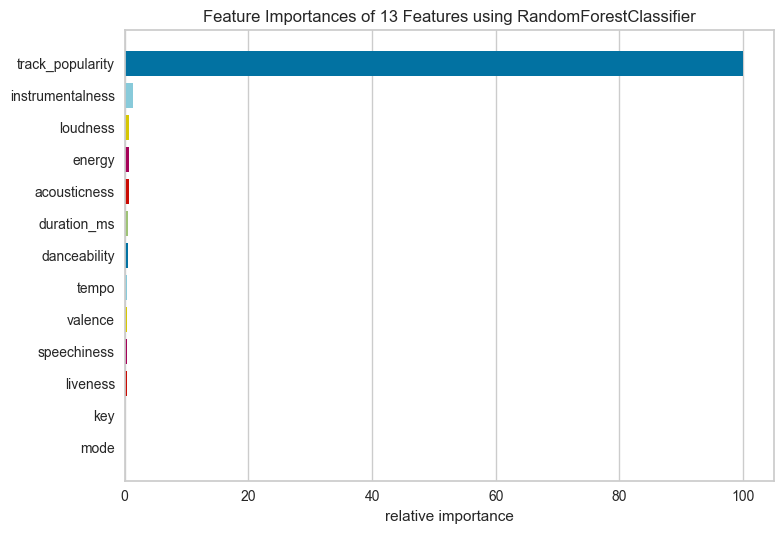

<Axes: title={'center': 'Feature Importances of 13 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [147]:
from yellowbrick.model_selection import FeatureImportances
rfcmodel = RandomForestClassifier()
viz = FeatureImportances(rfcmodel)
viz.fit(train_X, train_y)
viz.show()

In [152]:
from sklearn.metrics import mean_absolute_error
lrmodel = LogisticRegression(random_state = 0, max_iter = 1000)
lrmodel.fit(train_X, train_y)

val_predict = model.predict(test_X)
val_mean = mean_absolute_error(test_y, val_predict)

print("Mean absolute error of this model: ", val_mean)

lraccuracy = roc_auc_score(test_y, val_predict)
print('AUC: ', lraccuracy)

Mean absolute error of this model:  0.337953091684435
AUC:  0.5


In [158]:
dtmodel = DecisionTreeRegressor(random_state = 0)
dtmodel.fit(train_X, train_y)

val_predict1 = dtmodel.predict(test_X)
val_mean1 = mean_absolute_error(test_y, val_predict1)

print("Mean absolute error of this model: ", val_mean1)

dtaccuracy1 = roc_auc_score(test_y, val_predict1)
print('AUC: ', dtaccuracy1)

Mean absolute error of this model:  0.0
AUC:  1.0


In [159]:

rfmodel = RandomForestRegressor(random_state = 0)
rfmodel.fit(train_X, train_y)

rf_predict2 = rfmodel.predict(test_X)
rf_mean2 = mean_absolute_error(test_y, val_predict2)

print("Mean absolute error of this model: ", val_mean2)

dtaccuracy2 = roc_auc_score(test_y, val_predict2)
print('AUC: ', dtaccuracy2)

NameError: name 'RandomForestRegressor' is not defined